In [1]:
from enum import Enum
import pandas as pd

import pybcm
from matplotlib import pyplot as plt
from pybcm.config import BCMConfig
from pybcm.rest import RestClient
from pybcm.brick_data import BrickData
from pybcm.const import *

In [2]:
config = BCMConfig('../config/bcm.ini')
rc = RestClient(config)
bd = BrickData(config)

Initializing <class 'pybcm.config.BCMConfig'> ../config/bcm.ini


In [3]:
kc = bd.get_known_colors('3006', 'PART')

In [4]:
kc.head()

,quantity,color_name
color_id,,
1,108,White
2,18,Tan
3,76,Yellow
5,190,Red
6,5,Green


In [5]:
from pybcm.legoutils import legoColors

In [6]:
bd.get_part_price_summary('3006', 10)

,item_id,itemtype,color_id,new_or_used,currency_code,avg_price,max_price,min_price,qty_avg_price,unit_quantity,total_quantity,sold_or_stock
0,3006,PART,10,N,USD,0.7101,15.0,0.04,0.8536,1491,19784,sold


In [7]:
details = bd.get_part_price_details('3006', 10)
details.head()

,quantity,shipping_available,unit_price
0,1424,True,1.020
1,1148,True,0.785
2,568,True,0.550
3,451,True,0.990
4,433,True,0.950


In [8]:
import seaborn as sns

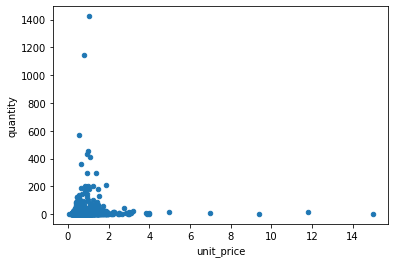

In [9]:
details.plot(x='unit_price', y='quantity', kind='scatter')

In [10]:
from collections import namedtuple

In [11]:
Type = namedtuple('Type', ('PART', 'SET'))

In [12]:
Type._make(('PART', 'SET'))

Type(PART='PART', SET='SET')

In [13]:
from pybcm.const import ItemType

In [14]:
ItemType.PART

'PART'

In [15]:
price_dict = rc.get_price_guide('3006', ItemType.PART, '1', new_or_used='N', guide_type='stock')

In [16]:
prices = pybcm.brick_data._details_df_from_json(price_dict)
len(prices)

AttributeError: module 'pybcm.brick_data' has no attribute '_details_df_from_json'

In [ ]:
import seaborn as sns


In [ ]:
sns.distplot(prices['unit_price'])

In [ ]:
cats = bd.get_categories()
cats.head()

In [ ]:
cats['category_name'][:10]

In [ ]:
import os
os.getcwd()

In [ ]:
partslist = r'../resources/Sampledata/Cougar_partslist.csv'
pdf = pd.read_csv(partslist, sep='\t', header=0, engine='python', na_values='', skipfooter=3, dtype={'BLItemNo':str, 'BLColorId':int, 'LDrawColorId':int, 'Qty':int})

In [ ]:
pdf.info()

In [ ]:
pdf.fillna({'BLColorId':'', 'Qty':0}).head() 

In [ ]:
(pdf['BLItemNo'] != pdf['LdrawId']).sum()

In [ ]:
pdf = pdf.rename(mapper={'BLItemNo':'item', 'BLColorId':'color'}, axis=1)
pdf = pdf.drop(columns=['ElementId', 'LdrawId', 'LDrawColorId'])

In [ ]:
pdf.head()

In [ ]:
bd.get_known_colors('3003', 'PART').head()

In [ ]:
inv = bd.rc.get_subsets('9492-1', ItemType.SET)
inv

In [ ]:
def _json_inv_to_list(inv: list)->dict:
    """
        Convert to a list of dictionaries appropriate for initiliazing a pandas DataFrame
    """
    flat_inv = []
    for item in inv:
        d = dict()
        e = item['entries'][0] # could be multiple matches, but use the first one. 
        d['item_id']     = e['item']['no']
        d['color_id']    = e['color_id']
        d['name']        = e['item']['name']
        d['itemtype']    = e['item']['type']
        d['category_id'] = e['item']['category_id']
        d['quantity']    = e['quantity']
        element_id = f"{d['item_id']}|{d['color_id']}"
        flat_inv.append(d)
    return flat_inv

In [ ]:
df = pd.DataFrame(inv_d, columns=['item_id', 'color_id', 'name', 'itemtype', 'category_id', 'quantity', ])
df[['item_id', 'color_id', 'category_id']]=df[['item_id', 'color_id', 'category_id']].astype(str)
df.info()

In [ ]:
df['element_id'] = df[['item_id', 'color_id']].apply(tuple, axis=1)
df.set_index('element_id', inplace=True)
df

In [ ]:
test_ps = bd.get_part_price_summary('2357', '86')
test_ps

In [3]:
inv = bd.get_set_inventory('9492-1')
test_inv = inv[0:5]
test_inv

,item_id,color_id,name,itemtype,category_id,quantity
element_id,,,,,,
"(2357, 86)",2357,86,Brick 2 x 2 Corner,PART,5,2
"(2420, 85)",2420,85,Plate 2 x 2 Corner,PART,26,4
"(2431, 86)",2431,86,Tile 1 x 4,PART,37,2
"(2432, 11)",2432,11,"Tile, Modified 1 x 2 with Handle",PART,38,1
"(2445, 11)",2445,11,Plate 2 x 12,PART,26,4


In [ ]:
test_ps.iloc[0].append(test_inv.iloc[0])

In [ ]:
def get_prices_for_row(row):
    ps = bd.get_part_price_summary(row['item_id'], row['color_id'])
    print(ps[ps['new_or_used']=='N'])
    
    
test_inv.apply(get_prices_for_row, axis=1)

In [ ]:
{'A', 'B'}.issubset(['A',]) # converts list to set implicitly

In [30]:
price_summary = pd.DataFrame()
for index, row in inv.iterrows():
    if row['itemtype'] == ItemType.PART:
        lineitem = bd.get_part_price_summary(row['item_id'], row['color_id'], 
                                             new_or_used=[NewUsed.N,],
                                             guide_type=GuideType.stock)
        print(lineitem)
        price_summary = price_summary.append(lineitem)

price_summary

  item_id itemtype  color_id new_or_used currency_code  avg_price  max_price  \
0    2357     PART        86           N           USD     0.1844     7.3525   

   min_price  qty_avg_price  unit_quantity  total_quantity sold_or_stock  \
0       0.03         0.1476           5420          279682         stock   

          region  
0  north_america  
  item_id itemtype  color_id new_or_used currency_code  avg_price  max_price  \
0    2420     PART        85           N           USD     0.1152     6.9201   

   min_price  qty_avg_price  unit_quantity  total_quantity sold_or_stock  \
0      0.018         0.0986           9075          652454         stock   

          region  
0  north_america  
  item_id itemtype  color_id new_or_used currency_code  avg_price  max_price  \
0    2431     PART        86           N           USD     0.1427       10.4   

   min_price  qty_avg_price  unit_quantity  total_quantity sold_or_stock  \
0       0.01          0.127          11057          921168 

,item_id,itemtype,color_id,new_or_used,currency_code,avg_price,max_price,min_price,qty_avg_price,unit_quantity,total_quantity,sold_or_stock,region
0,2357,PART,86,N,USD,0.1844,7.3525,0.0300,0.1476,5420,279682,stock,north_america
0,2420,PART,85,N,USD,0.1152,6.9201,0.0180,0.0986,9075,652454,stock,north_america
0,2431,PART,86,N,USD,0.1427,10.4000,0.0100,0.1270,11057,921168,stock,north_america
0,2432,PART,11,N,USD,0.0508,2.9800,0.0074,0.0427,6902,250467,stock,north_america
0,2445,PART,11,N,USD,0.2611,7.0000,0.0223,0.2735,3637,63678,stock,north_america
0,2540,PART,86,N,USD,0.0674,5.3500,0.0090,0.0475,6799,331510,stock,north_america
0,2654,PART,11,N,USD,0.0754,99.0000,0.0056,0.0473,9508,576650,stock,north_america
0,2817,PART,86,N,USD,0.0376,1.2500,0.0090,0.0358,2438,111965,stock,north_america
0,3004,PART,86,N,USD,0.0900,47.6449,0.0090,0.0688,19360,3612645,stock,north_america
0,3005,PART,85,N,USD,0.0929,3.3840,0.0065,0.0850,15968,2783996,stock,north_america


In [32]:
new_stock = price_summary[ (price_summary['new_or_used']=='N') & (price_summary['sold_or_stock']=='stock')]

In [34]:
new_stock['element_id'] = new_stock[['item_id', 'color_id']].apply(tuple, axis=1)
new_stock = new_stock.set_index('element_id')
new_stock = inv.merge(new_stock)
new_stock.head()

,item_id,color_id,name,itemtype,category_id,quantity,new_or_used,currency_code,avg_price,max_price,min_price,qty_avg_price,unit_quantity,total_quantity,sold_or_stock,region
0,2357,86,Brick 2 x 2 Corner,PART,5,2,N,USD,0.1844,7.3525,0.0300,0.1476,5420,279682,stock,north_america
1,2420,85,Plate 2 x 2 Corner,PART,26,4,N,USD,0.1152,6.9201,0.0180,0.0986,9075,652454,stock,north_america
2,2431,86,Tile 1 x 4,PART,37,2,N,USD,0.1427,10.4000,0.0100,0.1270,11057,921168,stock,north_america
3,2432,11,"Tile, Modified 1 x 2 with Handle",PART,38,1,N,USD,0.0508,2.9800,0.0074,0.0427,6902,250467,stock,north_america
4,2445,11,Plate 2 x 12,PART,26,4,N,USD,0.2611,7.0000,0.0223,0.2735,3637,63678,stock,north_america


,item_id,color_id,name,itemtype,category_id,quantity,new_or_used,currency_code,avg_price,max_price,min_price,qty_avg_price,unit_quantity,total_quantity,sold_or_stock,region,total_part_cost
43,6178,11,"Tile, Modified 6 x 12 with Studs on Edges",PART,38,8,N,USD,1.2523,10.50,0.0910,1.5990,403,4548,stock,north_america,12.7920
84,42445,86,Bar 12L with 1 x 2 Plate End Solid Studs and ...,PART,46,12,N,USD,1.4034,10.00,0.1500,0.7492,135,2269,stock,north_america,8.9904
39,4477,86,Plate 1 x 10,PART,26,12,N,USD,0.2015,14.00,0.0223,0.1960,4523,162117,stock,north_america,2.3520
82,4150pb086,86,"Tile, Round 2 x 2 with Black SW Tie Fighter Pa...",PART,812,2,N,USD,0.9076,1.55,0.4800,1.0638,5,10,stock,north_america,2.1276
51,2429c01,85,Hinge Plate 1 x 4 Swivel Top / Base,PART,22,8,N,USD,0.2538,32.00,0.0320,0.2557,3182,96928,stock,north_america,2.0456


In [41]:
new_stock['total_part_cost'].sum()

69.2715

In [50]:
new_stock['min_avg_price'] = new_stock[['avg_price', 'qty_avg_price']].min(axis=1)
new_stock['total_part_cost'] = new_stock['quantity']*new_stock['min_avg_price']
new_stock.sort_values('total_part_cost', ascending=False).head()

,item_id,color_id,name,itemtype,category_id,quantity,new_or_used,currency_code,avg_price,max_price,min_price,qty_avg_price,unit_quantity,total_quantity,sold_or_stock,region,total_part_cost,min_avg_price
43,6178,11,"Tile, Modified 6 x 12 with Studs on Edges",PART,38,8,N,USD,1.2523,10.50,0.0910,1.5990,403,4548,stock,north_america,10.0184,1.2523
84,42445,86,Bar 12L with 1 x 2 Plate End Solid Studs and ...,PART,46,12,N,USD,1.4034,10.00,0.1500,0.7492,135,2269,stock,north_america,8.9904,0.7492
39,4477,86,Plate 1 x 10,PART,26,12,N,USD,0.2015,14.00,0.0223,0.1960,4523,162117,stock,north_america,2.3520,0.1960
51,2429c01,85,Hinge Plate 1 x 4 Swivel Top / Base,PART,22,8,N,USD,0.2538,32.00,0.0320,0.2557,3182,96928,stock,north_america,2.0304,0.2538
82,4150pb086,86,"Tile, Round 2 x 2 with Black SW Tie Fighter Pa...",PART,812,2,N,USD,0.9076,1.55,0.4800,1.0638,5,10,stock,north_america,1.8152,0.9076


In [56]:
'|'.join(['3006', '86', 'N', 'stock'])

'3006|86|N|stock'